### Library Imports and Data Loading

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
pd.set_option('display.max_rows', 100)

## Driver model - Multiple regression 

Import data 

In [46]:
driver_df = pd.read_csv("data/race_6_driver_data_mr_train.csv")

In [47]:
driver_df

,driver,position,gap_to_leader,fantasy_points
0,VER_r1_fp1,6,0.369,45
1,PER_r1_fp1,12,0.544,31
2,NOR_r1_fp1,2,0.032,16
3,LEC_r1_fp1,8,0.399,22
4,SAI_r1_fp1,11,0.516,36
...,...,...,...,...
235,SAR_r5_fp1,15,1.984,8
236,HUL_r5_fp1,5,0.799,4
237,TSU_r5_fp1,12,1.704,-6
238,RIC_r5_fp1,9,0.936,-6


Check that data is linear (somewhat)

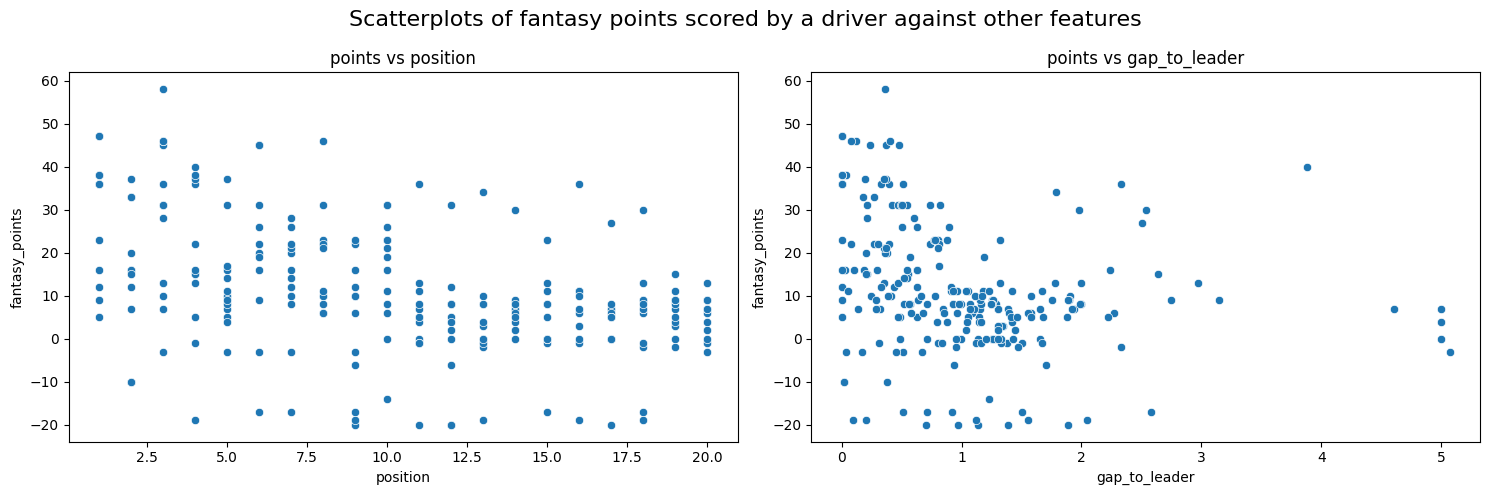

In [48]:
# Make sure the relationship looks linear
possible_features = ['position', 'gap_to_leader']

# Create 3 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=1, ncols=len(possible_features), figsize=(15, 5), sharey=False)

# Loop through 
for index, feature in enumerate(possible_features):
    sns.scatterplot(data=driver_df, x=feature, y="fantasy_points", ax=axes[index])
    axes[index].set_title(f'points vs {feature}')

fig.suptitle("Scatterplots of fantasy points scored by a driver against other features", fontsize=16)
fig.tight_layout()

Run backward selection to identify which features to use

In [49]:
# Create the model with everything first
selected_features = ['position', 'gap_to_leader']
y_train = driver_df["fantasy_points"]

# Initialize the model
model = LinearRegression()

# Perform backward selection
while len(selected_features) > 1:
    # Train and calculate initial score
    X_train = driver_df[selected_features]
    model.fit(X_train, y_train)
    initial_score = model.score(X_train, y_train)

    print("Features:", selected_features, "Score:", initial_score)

    worst_feature = None
    worst_score_diff = 1
    
    for feature in selected_features:
        # Create a new model without the current feature
        X_temp = X_train.drop(feature, axis=1)
        
        # Fit the model on the training data
        model.fit(X_temp, y_train)
        
        # Evaluate the model
        score = model.score(X_temp, y_train) 

        # Find the difference in the scores
        score_diff = initial_score - score

        print("Feature:", feature, "Score Diff:", score_diff, "Score:", score)
        
        # Update the worst feature if the current feature worsens the score
        if score_diff < worst_score_diff:
            worst_score_diff = score_diff
            worst_feature = feature
    
    # Remove the worst feature from the list of selected features
    selected_features.remove(worst_feature)
    print("Removed Feature:", worst_feature)

# Print final feature score
X_train = driver_df[selected_features]
model.fit(X_train, y_train)
initial_score = model.score(X_train, y_train)

print("Features:", selected_features, "Score:", initial_score)

Features: ['position', 'gap_to_leader'] Score: 0.17708605313665837
Feature: position Score Diff: 0.10939084545575206 Score: 0.06769520768090631
Feature: gap_to_leader Score Diff: 0.005522437018229742 Score: 0.17156361611842863
Removed Feature: gap_to_leader
Features: ['position'] Score: 0.17156361611842863


Create model with train/test split

In [50]:
# Extract Data
X = driver_df[['position', 'gap_to_leader']]
y = driver_df["fantasy_points"]

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Create the model
model = LinearRegression()

# Train the model
model = model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

[-1.07927045  0.84151224] 20.57902558660929


In [51]:
# Make predictions on test data
y_pred = model.predict(X_test)
y_pred

array([16.72645856,  6.05952918, 14.16904086, 15.4948744 ,  3.30183157,
        4.30031684,  7.52466398,  3.12174795, 10.26766612,  8.45498676,
       18.58542109, 15.61941821,  4.18587117, 15.45532332,  7.6769777 ,
       17.75692129, 10.28825218,  8.08556289,  7.22761016, 19.49975514,
       18.59383622, 18.53913792, 14.50480425, 16.6608206 , 12.72494386,
       12.50278463, 19.49975514, 10.47636116,  4.4694608 ,  4.63692174,
       12.5145658 , 19.49975514,  7.34794641,  2.12157965,  2.03108609,
        5.26973894,  1.49627407, 15.32741346,  5.29375304, 12.62901147,
        5.22895659,  3.55933431, 11.60443932, 16.59434114,  8.50126994,
       10.40988169, 19.49975514, 19.5270113 ])

Calculate the model's accuracy

In [52]:
model.score(X_test, y_test)

0.18091886524066647

### Take in a session worth of data to predict based on

In [53]:
driver_results_df = pd.read_csv("data/race_6_driver_data_mr_test.csv")

Make predictions and save them 

In [54]:
driver_results_df["fantasy_points"] = model.predict(driver_results_df[["position", "gap_to_leader"]])

In [55]:
driver_results_df

,driver,position,gap_to_leader,price,fantasy_points
0,VER_r6_fp1,1,0.000,30.1,19.499755
1,PER_r6_fp1,6,0.273,23.0,14.333136
2,NOR_r6_fp1,16,0.900,24.1,4.068059
3,LEC_r6_fp1,20,3.504,22.0,1.942276
4,SAI_r6_fp1,3,0.116,20.4,17.438830
5,HAM_r6_fp1,7,0.417,19.0,13.375043
6,RUS_r6_fp1,4,0.189,19.1,16.420990
7,MAG_r6_fp1,12,0.594,8.7,8.127638
8,ALO_r6_fp1,19,1.428,16.5,1.274567
9,GAS_r6_fp1,10,0.580,7.8,10.274398


In [56]:
# Sort the drivers by predicted points (high to low)
driver_results_df = driver_results_df.sort_values(by="fantasy_points", ascending=False)
driver_results_df

,driver,position,gap_to_leader,price,fantasy_points
0,VER_r6_fp1,1,0.000,30.1,19.499755
11,PIA_r6_fp1,2,0.105,19.9,18.508843
4,SAI_r6_fp1,3,0.116,20.4,17.438830
6,RUS_r6_fp1,4,0.189,19.1,16.420990
14,STR_r6_fp1,5,0.222,13.0,15.369489
1,PER_r6_fp1,6,0.273,23.0,14.333136
5,HAM_r6_fp1,7,0.417,19.0,13.375043
17,TSU_r6_fp1,8,0.461,8.4,12.332799
12,OCO_r6_fp1,9,0.568,9.0,11.343571
9,GAS_r6_fp1,10,0.580,7.8,10.274398


In [57]:
# Fix the driver column to only contain the driver's 3 letter representation
def fix_name(driver):
    return driver[0:3]

driver_results_df["driver"] = driver_results_df["driver"].map(fix_name) 

driver_results_df

,driver,position,gap_to_leader,price,fantasy_points
0,VER,1,0.000,30.1,19.499755
11,PIA,2,0.105,19.9,18.508843
4,SAI,3,0.116,20.4,17.438830
6,RUS,4,0.189,19.1,16.420990
14,STR,5,0.222,13.0,15.369489
1,PER,6,0.273,23.0,14.333136
5,HAM,7,0.417,19.0,13.375043
17,TSU,8,0.461,8.4,12.332799
12,OCO,9,0.568,9.0,11.343571
9,GAS,10,0.580,7.8,10.274398


Make a suggestion of the five drivers to use

In [58]:
print("five reccomended drivers: ")
print(driver_results_df["driver"][0:5])

five reccomended drivers: 
0     VER
11    PIA
4     SAI
6     RUS
14    STR
Name: driver, dtype: object


## Constructor model - Multiple regression 

In [59]:
constructor_df = pd.read_csv("data/race_6_constructor_data_mr_train.csv")

In [60]:
constructor_df

,constructor,position,fantasy_points
0,RED_r1_fp1,18,89
1,FER_r1_fp1,19,73
2,MER_r1_fp1,16,42
3,MCL_r1_fp1,5,36
4,AST_r1_fp1,19,20
...,...,...,...
115,ALP_r5_fp1,27,28
116,HAA_r5_fp1,11,26
117,WIL_r5_fp1,23,20
118,KCK_r5_fp1,21,4


<Axes: title={'center': 'position vs points'}, xlabel='position', ylabel='fantasy_points'>

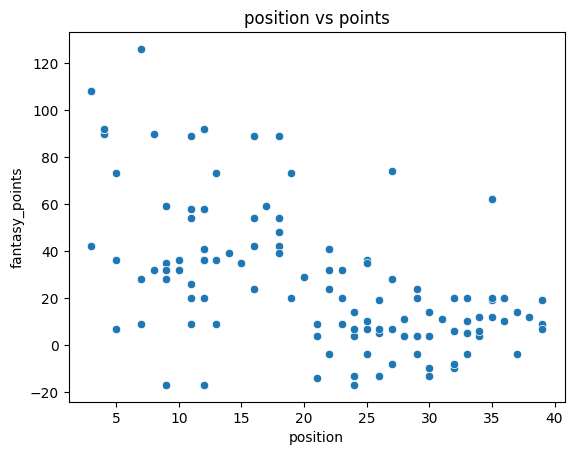

In [61]:
plt.title("position vs points")
sns.scatterplot(data=constructor_df, x="position", y="fantasy_points")

Make the model

In [62]:
# Extract Data
x = constructor_df[["position"]]
y = constructor_df["fantasy_points"]

# split into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# Create the model
c_model = LinearRegression()

# Train the model
c_model = model.fit(x_train, y_train)

print(c_model.coef_, c_model.intercept_)

[-1.60635468] 60.82332769822837


In [63]:
# make predictions on test data
y_pred = c_model.predict(x_test)

Calculate the model's accuracy

In [64]:
# accuracy
c_model.score(x_test, y_test)

0.44406503748019743

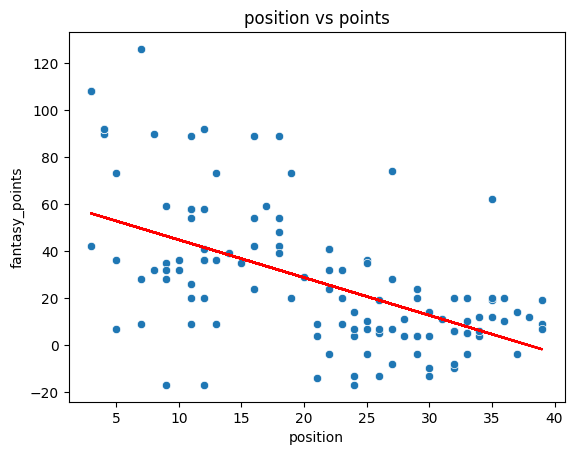

In [65]:
plt.title("position vs points")
sns.scatterplot(data=constructor_df, x="position", y="fantasy_points")
plt.plot(x_train, c_model.predict(x_train), color='r')

### Take in a session worth of data to predict based on

In [66]:
constructor_results_df = pd.read_csv("data/race_6_constructor_data_mr_test.csv")

In [67]:
constructor_results_df["fantasy_points"] = c_model.predict(constructor_results_df[["position"]])

In [68]:
# Sort the dataframe by expected points scored (high to low)
constructor_results_df = constructor_results_df.sort_values(by="fantasy_points", ascending=False)
constructor_results_df

,constructor,position,price,fantasy_points
0,RED_r6,7,28.6,49.578845
2,MER_r6,11,20.2,43.153426
3,MCL_r6,18,24.1,31.908943
5,ALP_r6,19,8.4,30.302589
9,VRB_r6,19,8.4,30.302589
1,FER_r6,23,21.5,23.877170
4,AST_r6,24,15.1,22.270815
6,HAA_r6,25,8.2,20.664461
7,WIL_r6,32,6.3,9.419978
8,KCK_r6,32,5.9,9.419978


In [69]:
# Fix the constructor column to only contain the constructor's 3 letter representer
def fix_name(team):
    return team[0:3]

constructor_results_df["constructor"] = constructor_results_df["constructor"].map(fix_name) 

constructor_results_df

,constructor,position,price,fantasy_points
0,RED,7,28.6,49.578845
2,MER,11,20.2,43.153426
3,MCL,18,24.1,31.908943
5,ALP,19,8.4,30.302589
9,VRB,19,8.4,30.302589
1,FER,23,21.5,23.877170
4,AST,24,15.1,22.270815
6,HAA,25,8.2,20.664461
7,WIL,32,6.3,9.419978
8,KCK,32,5.9,9.419978


Print out top 2 reccomended constructors

In [70]:
print("two reccomended constructors: ")
print(constructor_results_df["constructor"][0:2])

two reccomended constructors: 
0    RED
2    MER
Name: constructor, dtype: object


# Caluculating best team with cost taken into consideration

In [71]:
# Create the Driver class and make a Driver object for each driver based on the data from the dataframe
class Driver:
    def __init__ (self, name, points, cost):
        self.name = name
        self.points = points
        self.cost = cost
    
    def __repr__(self):
        return f"{self.name} has {self.points} points and costs ${self.cost}"

drivers = []

def create_driver(row):
    new_driver = Driver(row["driver"], row["fantasy_points"], row["price"])
    drivers.append(new_driver)

driver_results_df.apply(lambda row: create_driver(row), axis=1)

drivers


[VER has 19.4997551400367 points and costs $30.1,
 PIA has 18.508843478960806 points and costs $19.9,
 SAI has 17.438829667059295 points and costs $20.4,
 RUS has 16.42098961421298 points and costs $19.1,
 STR has 15.369489071653636 points and costs $13.0,
 PER has 14.333135749465157 points and costs $23.0,
 HAM has 13.375043065859463 points and costs $19.0,
 TSU has 12.332799157971202 points and costs $8.4,
 OCO has 11.34357052138096 points and costs $9.0,
 GAS has 10.274398221722276 points and costs $7.8,
 RIC has 9.197652311878162 points and costs $8.8,
 MAG has 8.127638499976653 points and costs $8.7,
 HUL has 7.153557083757272 points and costs $7.6,
 ALB has 6.140766104367913 points and costs $7.5,
 ZHO has 5.067386243495099 points and costs $7.1,
 NOR has 4.068059459990948 points and costs $24.1,
 BOT has 3.1074422396567805 points and costs $6.2,
 SAR has 2.2427574150047356 points and costs $6.3,
 LEC has 1.9422755540186643 points and costs $22.0,
 ALO has 1.274566584485136 point

In [72]:
team_recs = {'driver_1':[], 'driver_2':[], 'driver_3':[], 'driver_4':[], 'driver_5':[], 'total_points':[], 'total_cost':[]}

# Runs the knapsack algorithm to generate all possible combinations of 5 drivers, and saves them into a dictionary called team_recs
def driver_knapSack(team, remaining_drivers, team_cost=0, team_points=0):
    if team_cost > 87.8:
        return
    elif len(team) == 5 or len(remaining_drivers) == 0:
        if len(team) == 5:
            team_recs['driver_1'].append(team[0].name)
            team_recs['driver_2'].append(team[1].name)
            team_recs['driver_3'].append(team[2].name)
            team_recs['driver_4'].append(team[3].name)
            team_recs['driver_5'].append(team[4].name)
            team_recs['total_points'].append(team_points)
            team_recs['total_cost'].append(team_cost)
        return
    else:
        # Recursive call with current driver added
        team.append(remaining_drivers[0])
        driver_knapSack(team, remaining_drivers[1:], team_cost+remaining_drivers[0].cost, team_points+remaining_drivers[0].points)
        team.pop()

        # Recursive call with current driver not added
        driver_knapSack(team, remaining_drivers[1:], team_cost, team_points)

team = []

driver_knapSack(team, drivers)


In [73]:
# Creates a dataframe of possible combinations from the dictonary above
team_recs_df = pd.DataFrame(team_recs, columns = ['driver_1', 'driver_2', 'driver_3', 'driver_4', 'driver_5', 'total_points', 'total_cost'])
team_recs_df

,driver_1,driver_2,driver_3,driver_4,driver_5,total_points,total_cost
0,VER,PIA,SAI,TSU,GAS,78.054626,86.6
1,VER,PIA,SAI,TSU,RIC,76.977880,87.6
2,VER,PIA,SAI,TSU,MAG,75.907866,87.5
3,VER,PIA,SAI,TSU,HUL,74.933785,86.4
4,VER,PIA,SAI,TSU,ALB,73.920994,86.3
...,...,...,...,...,...,...,...
13466,ZHO,NOR,BOT,SAR,ALO,15.760212,60.2
13467,ZHO,NOR,BOT,LEC,ALO,15.459730,75.9
13468,ZHO,NOR,SAR,LEC,ALO,14.595045,76.0
13469,ZHO,BOT,SAR,LEC,ALO,13.634428,58.1


In [74]:
# Sorts the possible combinations by the number of expected points (high to low)
team_recs_df = team_recs_df.sort_values(by="total_points", ascending=False)
team_recs_df

,driver_1,driver_2,driver_3,driver_4,driver_5,total_points,total_cost
2477,PIA,SAI,RUS,STR,TSU,80.070951,80.8
2478,PIA,SAI,RUS,STR,OCO,79.081722,81.4
41,VER,PIA,RUS,TSU,OCO,78.105958,86.5
2487,PIA,SAI,RUS,HAM,TSU,78.076505,86.8
0,VER,PIA,SAI,TSU,GAS,78.054626,86.6
...,...,...,...,...,...,...,...
13467,ZHO,NOR,BOT,LEC,ALO,15.459730,75.9
13464,ALB,BOT,SAR,LEC,ALO,14.707808,58.5
13468,ZHO,NOR,SAR,LEC,ALO,14.595045,76.0
13469,ZHO,BOT,SAR,LEC,ALO,13.634428,58.1


In [75]:
# Isolates just the top 5 possible teams and saves them in a separate datafram
top_team_recs = team_recs_df[:5]
top_team_recs

,driver_1,driver_2,driver_3,driver_4,driver_5,total_points,total_cost
2477,PIA,SAI,RUS,STR,TSU,80.070951,80.8
2478,PIA,SAI,RUS,STR,OCO,79.081722,81.4
41,VER,PIA,RUS,TSU,OCO,78.105958,86.5
2487,PIA,SAI,RUS,HAM,TSU,78.076505,86.8
0,VER,PIA,SAI,TSU,GAS,78.054626,86.6


In [76]:
# Create the Constructor class and make a Constructor object for each constructor based on the data from the dataframe
class Constructor:
    def __init__ (self, name, points, cost):
        self.name = name
        self.points = points
        self.cost = cost
    
    def __repr__(self):
        return f"{self.name} has {self.points} points and costs ${self.cost}"

constructors = []

def create_constructor(row):
    new_constructor = Constructor(row["constructor"], row["fantasy_points"], row["price"])
    constructors.append(new_constructor)

constructor_results_df.apply(lambda row: create_constructor(row), axis=1)

constructors

[RED has 49.57884493643377 points and costs $28.6,
 MER has 43.15342621540828 points and costs $20.2,
 MCL has 31.90894345361368 points and costs $24.1,
 ALP has 30.30258877335731 points and costs $8.4,
 VRB has 30.30258877335731 points and costs $8.4,
 FER has 23.87717005233182 points and costs $21.5,
 AST has 22.270815372075454 points and costs $15.1,
 HAA has 20.66446069181908 points and costs $8.2,
 WIL has 9.41997793002448 points and costs $6.3,
 KCK has 9.41997793002448 points and costs $5.9]

In [77]:
constructor_results_df

,constructor,position,price,fantasy_points
0,RED,7,28.6,49.578845
2,MER,11,20.2,43.153426
3,MCL,18,24.1,31.908943
5,ALP,19,8.4,30.302589
9,VRB,19,8.4,30.302589
1,FER,23,21.5,23.877170
4,AST,24,15.1,22.270815
6,HAA,25,8.2,20.664461
7,WIL,32,6.3,9.419978
8,KCK,32,5.9,9.419978


In [78]:
cos_team_recs = {'constructor_1':[], 'constructor_2':[], 'total_points':[], 'total_cost':[]}

# Runs the knapsack algorithm to generate all possible combinations of 2 constructors, and saves them into a dictionary called cos_team_recs
def constructor_knapSack(team, remaining_constructors, team_cost=0, team_points=0):
    if team_cost > 100:
        return
    elif len(team) == 2 or len(remaining_constructors) == 0:
        if len(team) == 2:
            cos_team_recs['constructor_1'].append(team[0].name)
            cos_team_recs['constructor_2'].append(team[1].name)
            cos_team_recs['total_points'].append(team_points)
            cos_team_recs['total_cost'].append(team_cost)
        return
    else:
        # Recursive call with current driver added
        team.append(remaining_constructors[0])
        constructor_knapSack(team, remaining_constructors[1:], team_cost+remaining_constructors[0].cost, team_points+remaining_constructors[0].points)
        team.pop()

        # Recursive call with current driver not added
        constructor_knapSack(team, remaining_constructors[1:], team_cost, team_points)

team = []

constructor_knapSack(team, constructors)

In [79]:
# Creates a dataframe of possible combinations from the dictonary above
cos_team_recs_df = pd.DataFrame(cos_team_recs, columns = ['constructor_1', 'constructor_2', 'total_points', 'total_cost'])
cos_team_recs_df

,constructor_1,constructor_2,total_points,total_cost
0,RED,MER,92.732271,48.8
1,RED,MCL,81.487788,52.7
2,RED,ALP,79.881434,37.0
3,RED,VRB,79.881434,37.0
4,RED,FER,73.456015,50.1
5,RED,AST,71.849660,43.7
6,RED,HAA,70.243306,36.8
7,RED,WIL,58.998823,34.9
8,RED,KCK,58.998823,34.5
9,MER,MCL,75.062370,44.3


In [80]:
# Sorts the combinations by expected points (high to low)
cos_team_recs_df = cos_team_recs_df.sort_values(by="total_points", ascending=False)
cos_team_recs_df

,constructor_1,constructor_2,total_points,total_cost
0,RED,MER,92.732271,48.8
1,RED,MCL,81.487788,52.7
2,RED,ALP,79.881434,37.0
3,RED,VRB,79.881434,37.0
9,MER,MCL,75.062370,44.3
10,MER,ALP,73.456015,28.6
11,MER,VRB,73.456015,28.6
4,RED,FER,73.456015,50.1
5,RED,AST,71.849660,43.7
6,RED,HAA,70.243306,36.8


### Finding final team reccomendations

In [81]:
# Combines the dataframe of all constructor combinations with the top 5 driver combinations to find all possible fantasy team combinations
cross_recs_df = cos_team_recs_df.merge(top_team_recs, how='cross')
cross_recs_df

,constructor_1,constructor_2,total_points_x,total_cost_x,driver_1,driver_2,driver_3,driver_4,driver_5,total_points_y,total_cost_y
0,RED,MER,92.732271,48.8,PIA,SAI,RUS,STR,TSU,80.070951,80.8
1,RED,MER,92.732271,48.8,PIA,SAI,RUS,STR,OCO,79.081722,81.4
2,RED,MER,92.732271,48.8,VER,PIA,RUS,TSU,OCO,78.105958,86.5
3,RED,MER,92.732271,48.8,PIA,SAI,RUS,HAM,TSU,78.076505,86.8
4,RED,MER,92.732271,48.8,VER,PIA,SAI,TSU,GAS,78.054626,86.6
...,...,...,...,...,...,...,...,...,...,...,...
220,WIL,KCK,18.839956,12.2,PIA,SAI,RUS,STR,TSU,80.070951,80.8
221,WIL,KCK,18.839956,12.2,PIA,SAI,RUS,STR,OCO,79.081722,81.4
222,WIL,KCK,18.839956,12.2,VER,PIA,RUS,TSU,OCO,78.105958,86.5
223,WIL,KCK,18.839956,12.2,PIA,SAI,RUS,HAM,TSU,78.076505,86.8


In [82]:
# Filters the possible fantasy teams to only include those that fit within the cost cap
final_recs_df = cross_recs_df.loc[cross_recs_df['total_cost_x'] + cross_recs_df['total_cost_y'] < 100]
final_recs_df

,constructor_1,constructor_2,total_points_x,total_cost_x,driver_1,driver_2,driver_3,driver_4,driver_5,total_points_y,total_cost_y
75,ALP,VRB,60.605178,16.8,PIA,SAI,RUS,STR,TSU,80.070951,80.8
76,ALP,VRB,60.605178,16.8,PIA,SAI,RUS,STR,OCO,79.081722,81.4
135,VRB,HAA,50.967049,16.6,PIA,SAI,RUS,STR,TSU,80.070951,80.8
136,VRB,HAA,50.967049,16.6,PIA,SAI,RUS,STR,OCO,79.081722,81.4
140,ALP,HAA,50.967049,16.6,PIA,SAI,RUS,STR,TSU,80.070951,80.8
141,ALP,HAA,50.967049,16.6,PIA,SAI,RUS,STR,OCO,79.081722,81.4
170,VRB,WIL,39.722567,14.7,PIA,SAI,RUS,STR,TSU,80.070951,80.8
171,VRB,WIL,39.722567,14.7,PIA,SAI,RUS,STR,OCO,79.081722,81.4
175,VRB,KCK,39.722567,14.3,PIA,SAI,RUS,STR,TSU,80.070951,80.8
176,VRB,KCK,39.722567,14.3,PIA,SAI,RUS,STR,OCO,79.081722,81.4


In [83]:
# Calculates and creates columns to store the whole team's point and cost 
final_recs_df["total_team_points"] = final_recs_df['total_points_x'] + final_recs_df['total_points_y']

final_recs_df["total_team_cost"] = final_recs_df['total_cost_x'] + final_recs_df['total_cost_y']

final_recs_df

/var/folders/5j/3nf89wy94797pmc98lsh3xy00000gn/T/ipykernel_81303/3306444870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_recs_df["total_team_points"] = final_recs_df['total_points_x'] + final_recs_df['total_points_y']
/var/folders/5j/3nf89wy94797pmc98lsh3xy00000gn/T/ipykernel_81303/3306444870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_recs_df["total_team_cost"] = final_recs_df['total_cost_x'] + final_recs_df['total_cost_y']


,constructor_1,constructor_2,total_points_x,total_cost_x,driver_1,driver_2,driver_3,driver_4,driver_5,total_points_y,total_cost_y,total_team_points,total_team_cost
75,ALP,VRB,60.605178,16.8,PIA,SAI,RUS,STR,TSU,80.070951,80.8,140.676129,97.6
76,ALP,VRB,60.605178,16.8,PIA,SAI,RUS,STR,OCO,79.081722,81.4,139.686900,98.2
135,VRB,HAA,50.967049,16.6,PIA,SAI,RUS,STR,TSU,80.070951,80.8,131.038000,97.4
136,VRB,HAA,50.967049,16.6,PIA,SAI,RUS,STR,OCO,79.081722,81.4,130.048772,98.0
140,ALP,HAA,50.967049,16.6,PIA,SAI,RUS,STR,TSU,80.070951,80.8,131.038000,97.4
141,ALP,HAA,50.967049,16.6,PIA,SAI,RUS,STR,OCO,79.081722,81.4,130.048772,98.0
170,VRB,WIL,39.722567,14.7,PIA,SAI,RUS,STR,TSU,80.070951,80.8,119.793518,95.5
171,VRB,WIL,39.722567,14.7,PIA,SAI,RUS,STR,OCO,79.081722,81.4,118.804289,96.1
175,VRB,KCK,39.722567,14.3,PIA,SAI,RUS,STR,TSU,80.070951,80.8,119.793518,95.1
176,VRB,KCK,39.722567,14.3,PIA,SAI,RUS,STR,OCO,79.081722,81.4,118.804289,95.7


In [84]:
# Sorts all possible teams by the expected number of points scored
final_recs_df = final_recs_df.sort_values(by='total_team_points', ascending=False)
final_recs_df

,constructor_1,constructor_2,total_points_x,total_cost_x,driver_1,driver_2,driver_3,driver_4,driver_5,total_points_y,total_cost_y,total_team_points,total_team_cost
75,ALP,VRB,60.605178,16.8,PIA,SAI,RUS,STR,TSU,80.070951,80.8,140.676129,97.6
76,ALP,VRB,60.605178,16.8,PIA,SAI,RUS,STR,OCO,79.081722,81.4,139.686900,98.2
135,VRB,HAA,50.967049,16.6,PIA,SAI,RUS,STR,TSU,80.070951,80.8,131.038000,97.4
140,ALP,HAA,50.967049,16.6,PIA,SAI,RUS,STR,TSU,80.070951,80.8,131.038000,97.4
136,VRB,HAA,50.967049,16.6,PIA,SAI,RUS,STR,OCO,79.081722,81.4,130.048772,98.0
141,ALP,HAA,50.967049,16.6,PIA,SAI,RUS,STR,OCO,79.081722,81.4,130.048772,98.0
170,VRB,WIL,39.722567,14.7,PIA,SAI,RUS,STR,TSU,80.070951,80.8,119.793518,95.5
175,VRB,KCK,39.722567,14.3,PIA,SAI,RUS,STR,TSU,80.070951,80.8,119.793518,95.1
185,ALP,WIL,39.722567,14.7,PIA,SAI,RUS,STR,TSU,80.070951,80.8,119.793518,95.5
180,ALP,KCK,39.722567,14.3,PIA,SAI,RUS,STR,TSU,80.070951,80.8,119.793518,95.1


In [85]:
# Gets rid of unnecessary columns
final_recs_df = final_recs_df.drop(['total_points_x', 'total_cost_x', 'total_points_y', 'total_cost_y'], axis=1)
final_recs_df

,constructor_1,constructor_2,driver_1,driver_2,driver_3,driver_4,driver_5,total_team_points,total_team_cost
75,ALP,VRB,PIA,SAI,RUS,STR,TSU,140.676129,97.6
76,ALP,VRB,PIA,SAI,RUS,STR,OCO,139.686900,98.2
135,VRB,HAA,PIA,SAI,RUS,STR,TSU,131.038000,97.4
140,ALP,HAA,PIA,SAI,RUS,STR,TSU,131.038000,97.4
136,VRB,HAA,PIA,SAI,RUS,STR,OCO,130.048772,98.0
141,ALP,HAA,PIA,SAI,RUS,STR,OCO,130.048772,98.0
170,VRB,WIL,PIA,SAI,RUS,STR,TSU,119.793518,95.5
175,VRB,KCK,PIA,SAI,RUS,STR,TSU,119.793518,95.1
185,ALP,WIL,PIA,SAI,RUS,STR,TSU,119.793518,95.5
180,ALP,KCK,PIA,SAI,RUS,STR,TSU,119.793518,95.1


### Final Reccomendation

In [86]:
# Prints final reccomendation of top 5 teams
print("The top 5 expected F1 Fantasy teams for the race weekend: ")
final_recs_df[:5]

The top 5 expected F1 Fantasy teams for the race weekend: 


,constructor_1,constructor_2,driver_1,driver_2,driver_3,driver_4,driver_5,total_team_points,total_team_cost
75,ALP,VRB,PIA,SAI,RUS,STR,TSU,140.676129,97.6
76,ALP,VRB,PIA,SAI,RUS,STR,OCO,139.686900,98.2
135,VRB,HAA,PIA,SAI,RUS,STR,TSU,131.038000,97.4
140,ALP,HAA,PIA,SAI,RUS,STR,TSU,131.038000,97.4
136,VRB,HAA,PIA,SAI,RUS,STR,OCO,130.048772,98.0
